In [63]:
import numpy as np
import scipy.optimize
import scipy.interpolate as interp
from scipy import signal

from matplotlib.pyplot import *
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})
#Make numbers display in exponential form:
%precision %e

u'%e'

In [64]:
#Importing halo mass array from the Bolshoi simulation
mhal = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True, usecols=1)
#halo mass per 250/0.7 cubic megaparsecs

In [65]:
#Defining Hudson's fstar function
def fstar(m_indp,m1,f1,beta,gamma,*params):
    f1val=f1(*params[:3])
    m1val=m1(*params[3:])
    m1val=10.**12 #This override can be turned on to set the peak point manually
    fstar=2.*f1val*((m_indp/m1val)**-beta
                               +(m_indp/m1val)**gamma)**-1.
    return fstar

'''Hudson allows f1, the stellar fraction at a given mass, and m1, a 
characteristic halo mass, to evolve with 
redshift, the method of which the following functions reproduce.'''
def f1(fpoint5,z,fz):
    f1=fpoint5+(z-0.5)*fz
    return f1
def m1(logmpoint5,z,mz):
    logm1=logmpoint5+(z-0.5)*mz
    m1=10.**logm1
    return m1

#Redshift
z=0

#f1 inputs
fpoint5=0.0414
fz=0.029

#m1 inputs
logmpoint5=11.04
mz=0.56

#Other fstar inputs
beta=0.69
gamma=0.8

In [66]:
fstarofmhal=fstar(mhal,m1,f1,beta,gamma,fpoint5,z,fz,logmpoint5,z,mz)

In [67]:
#Attempt to add scatter to mstar

#sigma=2e-1 #sigma_{log(M_{star})} in dex

logfstarofmhal=np.log10(fstarofmhal) #Put f_*(M_h) in log

#Adding different scatters to log f_*
gaussn=fstarofmhal.size
gauss1=np.random.normal(0,0.1,gaussn) #create an array of Gaussian random deviates with std dev 0.1
gauss2=np.random.normal(0,0.2,gaussn) #create an array of Gaussian random deviates with std dev 0.2
gauss3=np.random.normal(0,0.3,gaussn) #create an array of Gaussian random deviates with std dev 0.3
logfstarofmhalprime1=gauss1+logfstarofmhal 
logfstarofmhalprime2=gauss2+logfstarofmhal 
logfstarofmhalprime3=gauss3+logfstarofmhal 

In [68]:
#Defining M_* based on Bolshoi halo masses, as distinct from f_*(M_*/M_h)
logmstarofmhalprime1=logfstarofmhalprime1+np.log10(mhal)
logmstarofmhalprime2=logfstarofmhalprime2+np.log10(mhal)
logmstarofmhalprime3=logfstarofmhalprime3+np.log10(mhal)

In [69]:
#Create the ability to customize axis label formats
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%.3f' % (x)
formatter = FuncFormatter(log_10_product)

plotbase=10 #The plots below will use a log scale for their y axes with base plotbase
#The plots below with display axes with the following ranges
ymin=min(logfstarofmhalprime3)
ymax=-1.6
xmin=10.**9.
xmax=max(mhal)

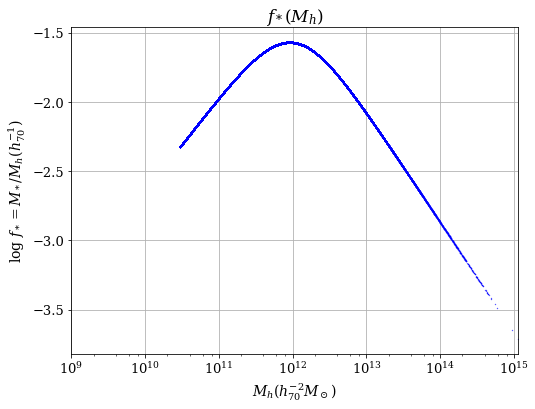

In [70]:
#Plotting Hudson's f_* using Bolshoi halo masses
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogx(mhal,logfstarofmhal,'bo',markersize=0.3)
#ax.set_yscale('log',basey=plotbase)
#ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_title('$f_*(M_h)$',fontsize=17)
ax.set_ylabel('log $f_*=M_*/M_h(h^{-1}_{70})$',fontsize=14)
ax.set_xlabel('$M_h(h_{70}^{-2}M_\odot)$',fontsize=14)
ax.tick_params(axis='both',labelsize=13)
#ax.yaxis.set_major_formatter(formatter) #Use the custom axis label format previously defined
ax.grid(True)
plt.show()

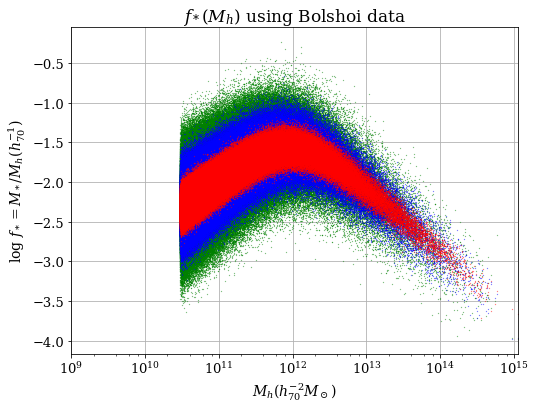

In [71]:
#Plotting Hudson's f_* using Bolshoi halo masses with scatter added
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogx(mhal,logfstarofmhalprime3,'go',markersize=0.2)
ax.semilogx(mhal,logfstarofmhalprime2,'bo',markersize=0.2)
ax.semilogx(mhal,logfstarofmhalprime1,'ro',markersize=0.2)
#ax.set_yscale('log',basey=plotbase)
#ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_title('$f_*(M_h)$ using Bolshoi data',fontsize=17)
ax.set_ylabel('log $f_*=M_*/M_h(h^{-1}_{70})$',fontsize=14)
ax.set_xlabel('$M_h(h_{70}^{-2}M_\odot)$',fontsize=14)
ax.tick_params(axis='both',labelsize=13)
#ax.yaxis.set_major_formatter(formatter) #Use the custom axis label format previously defined
ax.grid(True)
plt.show()

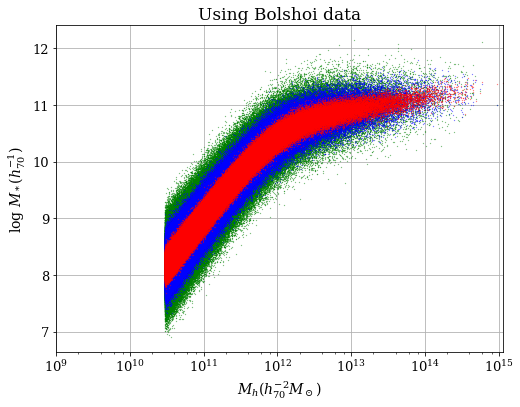

In [72]:
#Showing just M_* based on Bolshoi masses, not M_*/M_h
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogx(mhal,logmstarofmhalprime3,'go',markersize=0.2)
ax.semilogx(mhal,logmstarofmhalprime2,'bo',markersize=0.2)
ax.semilogx(mhal,logmstarofmhalprime1,'ro',markersize=0.2)
#ax.set_yscale('log',basey=plotbase)
#ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_title('Using Bolshoi data',fontsize=17)
ax.set_ylabel('log $M_*(h^{-1}_{70})$',fontsize=14)
ax.set_xlabel('$M_h(h_{70}^{-2}M_\odot)$',fontsize=14)
ax.tick_params(axis='both',labelsize=13)
#ax.yaxis.set_major_formatter(formatter) #Use the custom axis label format previously defined
ax.grid(True)
plt.show()

In [73]:
#Adding scatter not using Bolshoi but just using a logspace array
mhalcanned=np.logspace(8.,15.,int(1e5))
fstarofmhalcanned=fstar(mhalcanned,m1,f1,beta,gamma,fpoint5,z,fz,logmpoint5,z,mz)
logfstarofmhalcanned=np.log10(fstarofmhalcanned)

gausscannedn=logfstarofmhalcanned.size

gausscanned1=np.random.normal(0,0.1,gausscannedn)
logfstarofmhalcannedprime1=gausscanned1+logfstarofmhalcanned

gausscanned2=np.random.normal(0,0.2,gausscannedn)
logfstarofmhalcannedprime2=gausscanned2+logfstarofmhalcanned

gausscanned3=np.random.normal(0,0.3,gausscannedn)
logfstarofmhalcannedprime3=gausscanned3+logfstarofmhalcanned

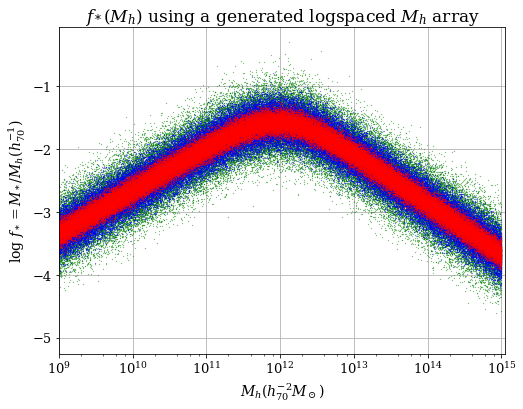

In [74]:
#Plotting f_* using the logspace arrays
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogx(mhalcanned,logfstarofmhalcannedprime3,'go',markersize=0.2)
ax.semilogx(mhalcanned,logfstarofmhalcannedprime2,'bo',markersize=0.2)
ax.semilogx(mhalcanned,logfstarofmhalcannedprime1,'ro',markersize=0.2)
#ax.set_yscale('log',basey=plotbase)
#ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_title('$f_*(M_h)$ using a generated logspaced $M_h$ array',fontsize=17)
ax.set_ylabel('log $f_*=M_*/M_h(h^{-1}_{70})$',fontsize=14)
ax.set_xlabel('$M_h(h_{70}^{-2}M_\odot)$',fontsize=14)
ax.tick_params(axis='both',labelsize=13)
#ax.yaxis.set_major_formatter(formatter) #Use the custom axis label format previously defined
ax.grid(True)
plt.show()

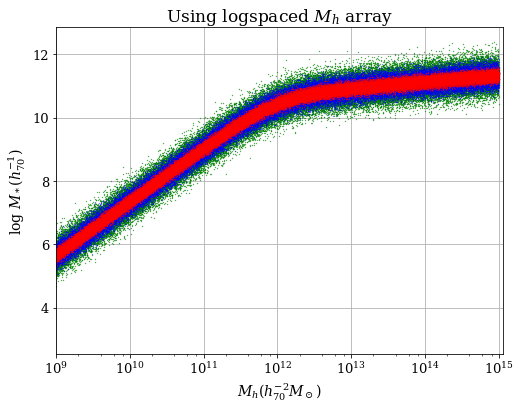

In [75]:
#Using the logspaced array but showing M_*, not M_*/M_h

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogx(mhalcanned,logfstarofmhalcannedprime3+np.log10(mhalcanned),'go',markersize=0.3)
ax.semilogx(mhalcanned,logfstarofmhalcannedprime2+np.log10(mhalcanned),'bo',markersize=0.2)
ax.semilogx(mhalcanned,logfstarofmhalcannedprime1+np.log10(mhalcanned),'ro',markersize=0.2)
#ax.set_yscale('log',basey=plotbase)
#ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_title('Using logspaced $M_h$ array',fontsize=17)
ax.set_ylabel('log $M_*(h^{-1}_{70})$',fontsize=14)
ax.set_xlabel('$M_h(h_{70}^{-2}M_\odot)$',fontsize=14)
ax.tick_params(axis='both',labelsize=13)
#ax.yaxis.set_major_formatter(formatter) #Use the custom axis label format previously defined
ax.grid(True)
plt.show()

In [76]:
'''Defining a function that will fill an array with the log stellar-mass
number densities given an array of log stellar masses, bins, and the size
of each of those bins'''
def nlogmstar(logmstarofmhal,logmstarbins,logmstarbinsize):
    #fig=plt.figure(figsize=(8,6))
    #ax=fig.add_subplot(1,1,1)
    freqlogmstar, binsout, patches = hist(logmstarofmhal,bins=logmstarbins,
                                             edgecolor='k',linewidth=0.2)
    plt.clf()
    
    fracer=1./np.sqrt(freqlogmstar) #Poisson fractional errors
    nlogmstar=freqlogmstar/(250./0.7)**3./logmstarbinsize #number of galaxies of a given mass per cubic Megaparsec per dex (diving by bin size to make the function independent of binsize, dividing by 0.7 is dividing by h)
    er=nlogmstar*fracer
    
    for (i,item) in enumerate(er):
        if np.isnan(item):
            er[i]=0
    
    return nlogmstar, er

In [77]:
'''binning the galaxies resulting from populating f_* with Bolshoi and 
various scatters of sigma_{logM_*}'''

logmstarbinsize=0.1 #Bin size in units of dex
#Creating the bins, which span from 8 dex to 15.06 dex:
logmstarbins=np.linspace(8,12,int((13.-8.)/logmstarbinsize+1)) #M_* bins in dex (Add 1 to the num arg because the elements include the starting point.)
logmstarmidbins=(logmstarbins[1:]+logmstarbins[:-1])/2

#getting the stellar-mass number density points for various values of scatter (sigma_{log M_*})
nlogmstar1,ernlogmstar1=nlogmstar(logmstarofmhalprime1,logmstarbins,logmstarbinsize)
nlogmstar2,ernlogmstar2=nlogmstar(logmstarofmhalprime2,logmstarbins,logmstarbinsize)
nlogmstar3,ernlogmstar3=nlogmstar(logmstarofmhalprime3,logmstarbins,logmstarbinsize)
print("Divide by zero and invalid multiplication warnings are okay here. "
      "It just means there's nothing in the bin.")

c:\python27\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in divide
c:\python27\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in multiply


Divide by zero and invalid multiplication warnings are okay here. It just means there's nothing in the bin.


In [78]:
#defining the SMF by Baldy et. al. 2012
def smf(m,m_ast,phi_ast1,phi_ast2,alpha1,alpha2):
    return np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

m_asttrue = 10.**10.66 #M* in solar mass
phi_ast1true = 3.96*10.**-3. #Mpc^-3
alpha1true = -0.35
phi_ast2true = 0.79*10.**-3. #Mpc^-3
alpha2true = -1.47

smftrue=smf(10.**logmstarmidbins,m_asttrue,phi_ast1true,phi_ast2true,alpha1true,
            alpha2true)

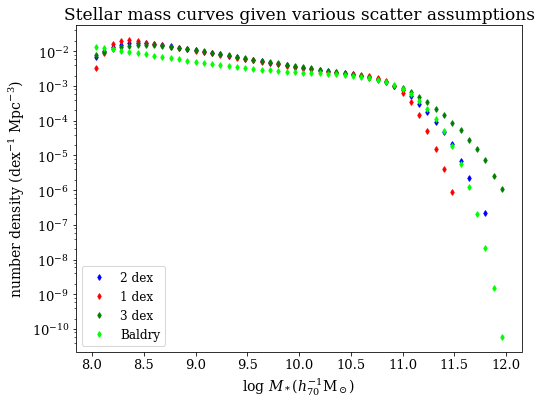

In [79]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogy(logmstarmidbins,nlogmstar2,'bd',markersize=4,label='2 dex')
ax.semilogy(logmstarmidbins,nlogmstar1,'rd',markersize=4,label='1 dex')
ax.semilogy(logmstarmidbins,nlogmstar3,'gd',markersize=4,label='3 dex')
truecol=(0.,255./255.,0./255.)
ax.semilogy(logmstarmidbins,smftrue,'d',mfc=truecol,mec=truecol,
            markersize=4,label='Baldry')
ax.tick_params(axis='both',labelsize=13)
ax.set_title('Stellar mass curves given various scatter assumptions',
             fontsize=17)
ax.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=14)
ax.set_xlabel('log $M_*(h_{70}^{-1}$M$_\odot$)',fontsize=14)
ax.legend(fontsize=12)
plt.show()

Optimized parameters:
m_ast: 3.73e+10
phi_ast1: 3.51e-03
phi_ast2: 2.00e-03
alpha1: 7.36e-02
alpha2: -1.46e+00


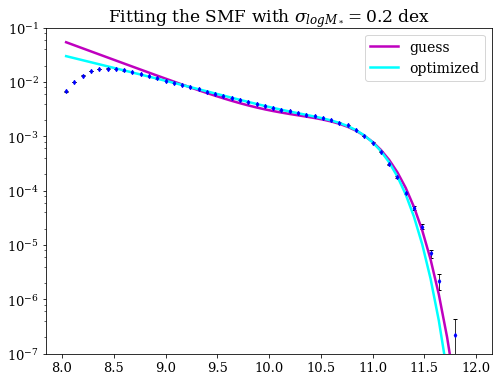

In [84]:
#initial guesses for smf parameters
m_ast0 = 10.**10.66 #M* in solar mass
phi_ast10 = 3.96*10.**-3. #Mpc^-3
alpha10 = -0.35
phi_ast20 = 0.79*10.**-3. #Mpc^-3
alpha20 = -1.7#-1.47

smftest=smf(10.**logmstarmidbins,m_ast0,phi_ast10,phi_ast20,alpha10,alpha20)

'''
#seeing what the error bars look like on the sigma=0.2 dex data
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.errorbar(logmstarmidbins,nlogmstar2,ernlogmstar2,fmt='bd',capsize=2,
            ecolor='k', elinewidth=0.8,ms=1)
ax.plot(logmstarmidbins,smftest)
ax.set_yscale('log')
#ax.set_ylim(10.**-6.,10.**-1.)
plt.show()
'''

endidx=-4
begidx=6

#Run the scipy optimizer, calling the defined function
nlfit2,nlpcov2=scipy.optimize.curve_fit(smf,10.**logmstarmidbins[begidx:endidx],
                                        nlogmstar2[begidx:endidx],
                                        p0=[m_ast0,phi_ast10,phi_ast20,alpha10,
                                            alpha20],sigma=ernlogmstar2[begidx:endidx],
                                        maxfev=int(5e4))
m_ast,phi_ast1,phi_ast2,alpha1,alpha2=nlfit2
print('Optimized parameters:\nm_ast: {0:0.2e}'
      '\nphi_ast1: {1:0.02e}'
      '\nphi_ast2: {2:0.02e}'
      '\nalpha1: {3:0.02e}'
      '\nalpha2: {4:0.02e}'.format(m_ast,phi_ast1,phi_ast2,alpha1,alpha2))

fittednlogmstar2=smf(10.**logmstarmidbins,m_ast,phi_ast1,phi_ast2,alpha1,alpha2)

#seeing what the error bars look like on the sigma=0.2 dex data
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.errorbar(logmstarmidbins,nlogmstar2,ernlogmstar2,fmt='bd',capsize=2,
            ecolor='k', elinewidth=0.8,ms=3)
ax.plot(logmstarmidbins,smftest,'m-',linewidth=2.5,label='guess')
col = (0.,255./255.,255./255.) #Define optimized line color
ax.plot(logmstarmidbins,fittednlogmstar2,'c-',linewidth=2.5,color=col,
        label='optimized')
ax.set_yscale('log')
ax.tick_params(axis='both',labelsize=13)
ax.set_ylim(10.**-7.,10.**-1.)
ax.legend(fontsize=14)
ax.set_title('Fitting the SMF with $\sigma_{log M_*}=0.2$ dex',fontsize=17)
plt.show()

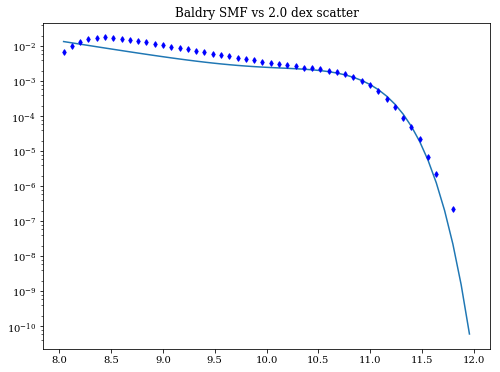

In [85]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.semilogy(logmstarmidbins,smftrue)
ax.semilogy(logmstarmidbins,nlogmstar2,'bd',markersize=4)
ax.set_title('Baldry SMF vs 2.0 dex scatter')
plt.show()

In [82]:
print nlogmstar2

[6.7156E-03 9.9175E-03 1.3126E-02 1.5716E-02 1.7284E-02 1.7671E-02
 1.7314E-02 1.6328E-02 1.5095E-02 1.3926E-02 1.2693E-02 1.1621E-02
 1.0609E-02 9.6536E-03 8.8043E-03 8.1418E-03 7.3879E-03 6.6565E-03
 6.0394E-03 5.5569E-03 5.1350E-03 4.6213E-03 4.2670E-03 3.9498E-03
 3.6348E-03 3.3483E-03 3.0785E-03 2.8799E-03 2.6685E-03 2.4426E-03
 2.3295E-03 2.1612E-03 1.9763E-03 1.7818E-03 1.5900E-03 1.3072E-03
 1.0168E-03 7.7095E-04 5.2158E-04 3.0557E-04 1.7693E-04 9.1320E-05
 4.8294E-05 2.1952E-05 7.0246E-06 2.1952E-06 0.0000E+00 2.1952E-07
 0.0000E+00 0.0000E+00]
